<a href="https://colab.research.google.com/github/IshitaAgrawal-N/Machine-Learning-Regression-Models/blob/main/BIOMASS_CONC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **NEURAL NETWORK MODEL**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())


   Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
0       7.997728      29.666590  ...      0.100000       15.000000
1       7.786650      30.725216  ...      0.105235       14.989514
2       7.667642      30.741825  ...      0.110740       14.978389
3       7.641116      30.311470  ...      0.116530       14.966589
4       8.304563      29.958562  ...      0.122621       14.954077

[5 rows x 13 columns]


In [ ]:
print(df.describe())

       Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
count   48000.000000   48000.000000  ...  48000.000000    48000.000000
mean        7.174676      33.084610  ...     10.997847        2.043106
std         1.087719       4.223971  ...      3.718742        6.038446
min         4.653990      23.979445  ...      0.000634       -0.010375
25%         6.262741      30.008750  ...     10.912407        0.012933
50%         7.289793      33.304819  ...     12.793935        0.022299
75%         8.044820      36.443006  ...     13.080617        0.057500
max         9.446993      40.697969  ...     13.489368       29.336738

[8 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Biomass Conc']

In [ ]:
print(X)


       Aeration Rate  AgitatorPower  ...         VOL       Heat
0           7.997728      29.666590  ...  100.000000   0.008368
1           7.786650      30.725216  ...   99.987549   0.021791
2           7.667642      30.741825  ...   99.975100   0.071371
3           7.641116      30.311470  ...   99.962653   0.093127
4           8.304563      29.958562  ...   99.950208   0.142380
...              ...            ...  ...         ...        ...
47995       5.421724      36.327411  ...  105.720389  76.572162
47996       5.217079      35.776739  ...  105.729643  76.576014
47997       5.694386      35.206284  ...  105.738909  76.564558
47998       5.562624      36.284345  ...  105.748192  76.555443
47999       5.574685      35.997997  ...  105.757491  76.535246

[48000 rows x 10 columns]


In [ ]:
print(y)

0         0.100000
1         0.105235
2         0.110740
3         0.116530
4         0.122621
           ...    
47995    13.030947
47996    13.029589
47997    13.028279
47998    13.027020
47999    13.025816
Name: Biomass Conc, Length: 48000, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test_scaled)

[[-0.77346914  1.37783364  0.38123198 ...  0.46400136  1.58997535
   0.58232551]
 [-0.49204976  0.16752631  0.43282061 ... -0.30668483 -1.14626671
  -0.23690715]
 [-0.46701665 -1.82319065 -2.6629187  ... -2.90900815 -1.22421445
  -2.80568642]
 ...
 [-1.6163894  -1.02952337  0.38396933 ...  0.51943729  0.26547936
   0.65374575]
 [ 0.05831028  1.05774776  0.38102141 ... -0.08271203 -1.32254172
  -0.56494077]
 [ 0.79658618 -0.12047534  0.28458225 ...  0.59098659  1.67797132
   0.5435943 ]]


In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose=0)


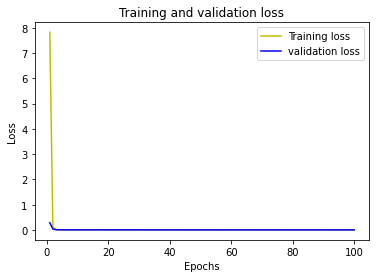

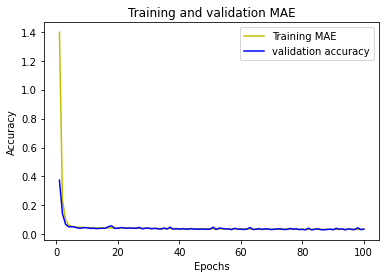

In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')

plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test_scaled[:10])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:10])

Predicted values are:  [[13.161388  ]
 [10.163709  ]
 [ 0.42606318]
 [ 0.33233383]
 [13.049739  ]
 [12.701723  ]
 [13.167815  ]
 [12.997355  ]
 [10.195791  ]
 [13.070933  ]]
Real values are:  31164    13.154615
15339    10.161854
32055     0.446778
30430     0.345407
17544    12.979028
6875     12.699931
36585    13.130444
38943    12.973355
40246    10.173145
8625     13.021007
Name: Biomass Conc, dtype: float64


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural network: ', mse_neural)
print('Mean absolute error from neural network: ', mae_neural)


300/300 [==============================] - 0s 947us/step - loss: 9.4980e-04 - mae: 0.0238
Mean squared error from neural network:  0.0009497990249656141
Mean absolute error from neural network:  0.023823576048016548


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# **LINEAR REGRESSION MODEL**

In [ ]:
import pandas as pd
import numpy as np
data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())



FileNotFoundError: ignored

In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Biomass Conc']

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)


In [ ]:
y_pred=ml.predict(X_test)
print(y_pred)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Biomass Concentration')
plt.ylabel('Predicted Biomass Concentration')
plt.title('Biomass Concentration: Actual vs Predicted')


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:10]


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


In [ ]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
X_train = add_constant(X_train)
OLS(y_train, X_train).fit().summary()

# **RANDOM FOREST REGRESSION MODEL**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())


   Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
0       7.997728      29.666590  ...      0.100000       15.000000
1       7.786650      30.725216  ...      0.105235       14.989514
2       7.667642      30.741825  ...      0.110740       14.978389
3       7.641116      30.311470  ...      0.116530       14.966589
4       8.304563      29.958562  ...      0.122621       14.954077

[5 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Biomass Conc']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((X_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)


R-Square Error associated with Random Forest Regression is: 0.9999689894754747


Text(0.5, 1.0, 'Biomass Concentration: Actual vs Predicted using Random Forest Regression')

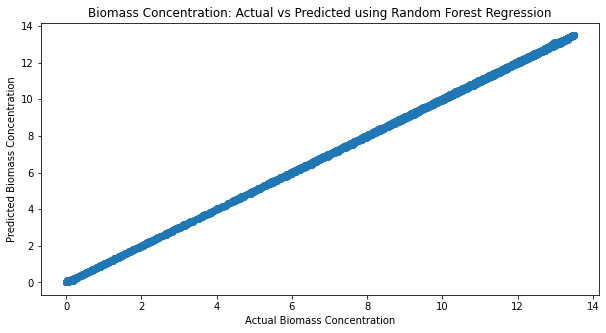

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_predict_rfr)
plt.xlabel('Actual Biomass Concentration')
plt.ylabel('Predicted Biomass Concentration')
plt.title('Biomass Concentration: Actual vs Predicted using Random Forest Regression')


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value' :y_test, 'Predicted Value' :y_predict_rfr, 'Difference' :y_test-y_predict_rfr})
pred_y_df[0:40]


,Actual Value,Predicted Value,Difference
37957,12.470112,12.441208,0.028903
45965,13.109609,13.110500,-0.000891
33541,13.054118,13.043132,0.010986
9905,11.415595,11.391619,0.023976
9472,12.949333,12.952003,-0.002670
23682,13.008011,12.980701,0.027310
12880,3.887685,3.898110,-0.010425
786,13.064879,13.070671,-0.005792
3015,13.220514,13.219937,0.000576
37111,12.324558,12.292767,0.031791


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error for Random Forest Regression for Biomass Concentration: ', mse_rf)
print('Mean absolute error for Random Forest Regression for Biomass Concentration: ', mae_rf)


Mean squared error for Random Forest Regression for Penicillin Concentration:  0.0004249660606769363
Mean absolute error for Random Forest Regression for Penicillin Concentration:  0.01354807909790831


In [ ]:
import pandas as pd
Parameters_list = list(X.columns)
Parameters_imp = pd.Series(model.feature_importances_,index=Parameters_list).sort_values()
print(Parameters_imp)

Temp                0.000003
Substrate feed T    0.000003
pH                  0.000003
Dis O2 Conc.        0.000013
Subst Feed Conc.    0.000015
CO2 Conc.           0.000016
Aeration Rate       0.000021
AgitatorPower       0.000041
VOL                 0.000065
Heat                0.999819
dtype: float64
